In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [154]:
USAhousing = pd.read_csv('USA_Housing.csv')

In [155]:
USAhousing.shape

(5000, 7)

In [156]:
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Address,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,"188 Johnson Views Suite 079\nLake Kathleen, CA...",1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,USS Barnett\nFPO AP 44820,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,USNS Raymond\nFPO AE 09386,6.309435e+05


In [157]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Address                       5000 non-null   object 
 6   Price                         5000 non-null   float64
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [158]:
USAhousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [159]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Address', 'Price'],
      dtype='object')

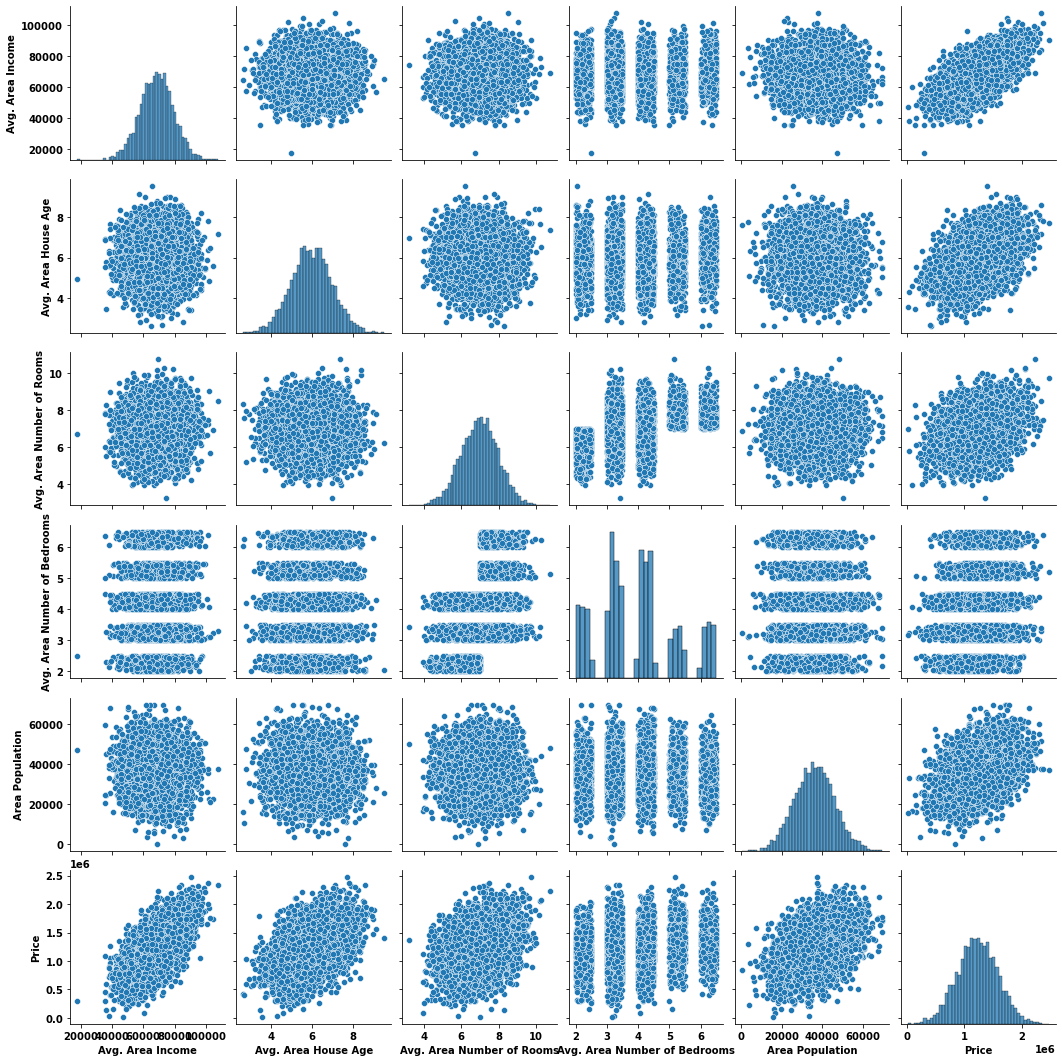

In [160]:
sns.pairplot(USAhousing)

In [161]:
#sns.distplot(USAhousing['Price'])

In [162]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [165]:
X_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
398,61200.72618,5.299694,6.234615,4.23,42789.69222
3833,63380.81467,5.344664,6.001574,2.45,40217.33358
4836,71208.26930,5.300326,6.077989,4.01,25696.36174
4572,50343.76352,6.027468,5.160240,4.35,27445.87674
636,54535.45372,5.278065,6.871038,4.41,30852.20701
...,...,...,...,...,...
3138,77352.63760,9.008900,5.894762,3.49,39667.50726
191,53306.92214,4.632268,6.194794,2.15,39063.33871
3294,64750.77730,5.919584,5.758484,4.06,54048.34439
3073,77509.13780,6.120737,7.350362,5.46,18264.23005


In [166]:
from sklearn.linear_model import LinearRegression

In [167]:
lm = LinearRegression()

In [168]:
lm.fit(X_train,y_train)

LinearRegression()

In [169]:
predictions = lm.predict(X_test)

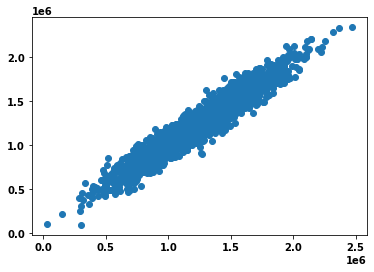

In [170]:
plt.scatter(y_test,predictions)

In [171]:
from sklearn import metrics

In [172]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 101136.85179042826


**Loss Function: Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$


In [173]:
accuracy = lm.score(X_test,y_test)
print(accuracy*100,'%')

91.94359023079336 %
